# CSCE 556 - Data Analysis in Python: Application to Neuroscience

## Laboratory 6 - Statistical analysis

### Loading data

Loading the DataFrame created in Lab 3 and reused in Lab 4.

In [1]:
import pandas as pd
import numpy as np
import urllib.request

url = "https://www.dropbox.com/scl/fi/htbx8k6zyrwot3ezhy94g/lab2_psds_df.csv?rlkey=cx1due0g44gy3dqm4089krewa&dl=1"
urllib.request.urlretrieve(url, "psds_df.csv");
psds_df = pd.read_csv("psds_df.csv", index_col=0)
psds_df.head()

,Fp1,Fp2,F7,F3,Fz,F4,F8,FC5,FC1,FC2,...,P1,P2,P6,PO7,PO3,POz,PO4,PO8,subject,exp_type
frequencies,,,,,,,,,,,,,,,,,,,,,
0.0,5.296473e-12,5.345212e-12,4.839363e-12,1.194496e-12,8.185229e-13,2.015723e-12,3.553680e-12,1.841777e-12,2.881066e-14,5.412896e-14,...,9.662441e-13,1.971637e-12,1.020278e-12,7.323966e-13,7.133765e-13,1.335183e-12,1.606456e-12,9.914420e-13,32480,EO
0.1,9.617907e-12,9.376135e-12,8.144545e-12,1.875522e-12,1.562134e-12,3.555659e-12,5.262979e-12,2.922395e-12,7.400721e-14,1.079767e-13,...,4.072498e-12,5.743528e-12,4.642100e-12,2.933705e-12,4.680520e-12,5.701553e-12,6.637278e-12,4.468408e-12,32480,EO
0.2,1.065529e-11,1.142334e-11,9.773208e-12,2.270169e-12,1.426086e-12,4.128516e-12,6.322388e-12,4.381336e-12,2.776335e-13,2.650003e-13,...,3.324117e-12,4.309392e-12,6.100235e-12,2.646616e-12,3.394135e-12,4.230686e-12,6.822197e-12,5.980368e-12,32480,EO
0.3,2.086972e-11,1.998838e-11,1.086430e-11,4.013279e-12,2.990372e-12,7.300068e-12,9.220488e-12,4.906117e-12,6.293578e-13,5.530025e-13,...,1.305469e-11,2.192058e-11,2.840842e-11,1.752862e-11,2.340383e-11,3.297861e-11,4.232137e-11,3.631017e-11,32480,EO
0.4,2.418604e-11,2.331679e-11,1.886223e-11,6.750615e-12,2.094963e-12,5.637580e-12,1.171261e-11,1.138564e-11,1.067144e-12,5.971324e-13,...,3.140410e-11,3.694947e-11,4.314551e-11,2.638150e-11,4.756646e-11,5.310054e-11,5.584660e-11,4.588419e-11,32480,EO


Use **facet_grid = sns.displot(...)** (note: not **distplot** but **displot**) to plot the kernel density estimation (KDE) of the density function for the distribution of the log10(PSD) values across frequencies for the channel "PO8". Use **subject** as a **row** factor and **exp_type** as a **col** factor to create a 2 X 4 grid of plots. Use **common_norm=False** as an argument to **displot(...)** so that each plot has a total area under the curve equal to one (instead of the total sum of their area being equal to one [default behavior]).

Note that, as opposed to every Seaborn function we used so far, **displot** is a figure-level method. We used only ax-level methods (e.g., **lineplot**, **violinplot**) and one matrix-based method (i.e., **heatmap**) in the previous lab.

Your **facet_grid** object is of type **FacetGrid** and contains an attribute **axes** which will be a 2X4 array of **Axes** object and an attribute **fig** of type **Figure**. Use the **axes** attribute to overlay the best-fitting normal distribution for each of these 8 samples (you can use **scipy.stats.nom** and look at the similar example in the slides). Use red dashed lines for the overlaid normal distributions.

Based on this plot, these distributions do not appear to be normal. Use **scipy.stats.normaltest** to confirm this and write in red on each panel the p-value obtained for this test. For this use **matplotlib**'s **text(...)** function (which is available both as a function of the matplotlib.pyplot module  [i.e., Matplotlib's Pyplot API] and as a method of the **Axes** class [i.e., Matplotlib's object-oriented API]).

\* **distplot** (ax-level) is being deprecated in favor of the more flexible **displot** (figure-level), kdeplot (ax-level), and histplot (ax-level) functions.

**QUESTION 1.** In blackboard, enter the p-value for panel "exp_type = EC | subject = 32480" using exactly the X.XXe-XX format.

**QUESTION 2.** What do you conclude from this p-value?

<ipython-input-2-b634f20b75cd>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  psds_df_PO8['log10_PSD'] = np.log10(psds_df_PO8['PSD'])


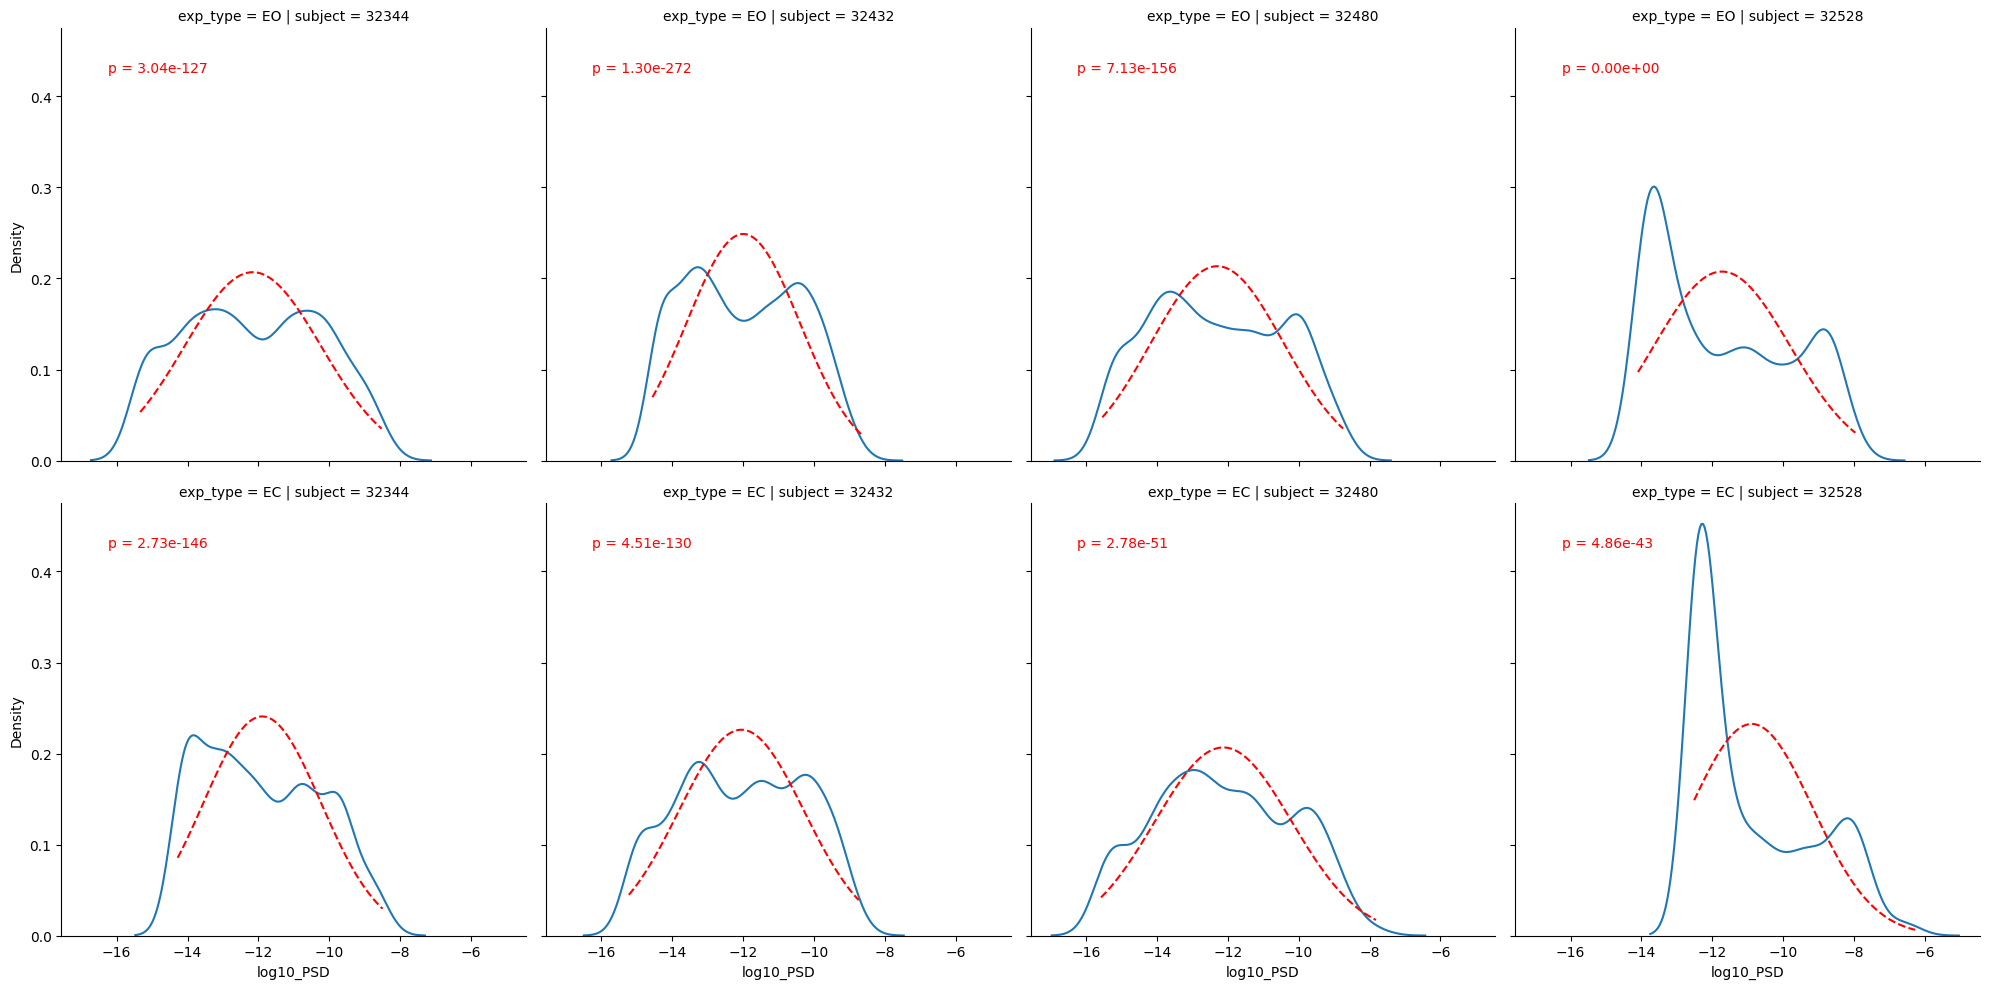

In [2]:
##### insert your code #####
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm, normaltest

# Reset index
psds_df_reset = psds_df.reset_index()

# Melt DataFrame
psds_df_melt = psds_df_reset.melt(id_vars=['frequencies', 'subject', 'exp_type'], var_name='channel', value_name='PSD')

# Filter DataFrame for channel "PO8"
psds_df_PO8 = psds_df_melt[psds_df_melt['channel'] == 'PO8']

# Calculate log10(PSD) values
psds_df_PO8['log10_PSD'] = np.log10(psds_df_PO8['PSD'])

# Create FacetGrid
facet_grid = sns.displot(data=psds_df_PO8, row='exp_type', col='subject', x='log10_PSD', kind='kde', common_norm=False)

# Overlay best-fitting normal distribution
for (exp_type, subject), ax in facet_grid.axes_dict.items():
    data = psds_df_PO8[(psds_df_PO8['subject'] == subject) & (psds_df_PO8['exp_type'] == exp_type)]['log10_PSD']
    mu, std = norm.fit(data)
    x = np.linspace(data.min(), data.max(), 100)
    p = norm.pdf(x, mu, std)
    ax.plot(x, p, 'r--')

# Perform normality test and write p-value on each panel
for (exp_type, subject), ax in facet_grid.axes_dict.items():
    data = psds_df_PO8[(psds_df_PO8['subject'] == subject) & (psds_df_PO8['exp_type'] == exp_type)]['log10_PSD']
    _, p = normaltest(data)
    ax.text(0.1, 0.9, f'p = {p:.2e}', transform=ax.transAxes, color='red')
############################

Q2 Answer:
The p-value you obtained is extremely small (2.78e-51), which is practically zero. In hypothesis testing, a p-value less than 0.05 is typically interpreted as strong evidence against the null hypothesis.

In this case, the null hypothesis of the normality test is that the data follows a normal distribution. Since the p-value is significantly less than 0.05, you can reject the null hypothesis and conclude that the data does not follow a normal distribution.

In other words, for the panel "exp_type = EC | subject = 32480", the log10(PSD) values do not appear to be normally distributed.

Use the same **displot** call as previously, but instead of using **exp_type** as the **row** argument, use it as the **hue** argument to compare the distributions between the two experimental conditions more easily.

Since these samples do not have a normal distribution, we should not use the Student's t statistics to test if the means of these distributions are different; we need to use a non-parametric (i.e., not assuming a specific type of distribution) test. For each of the four panels, use the proper non-parametric test to compare these **two related samples** and write in red on the plots their corresponding p-values.

**QUESTION 3.** In Blackboard, enter the p-value for panel "subject = 32480" using exactly the X.XXe-XX format.

**QUESTION 4.** What do you conclude from this p-value?

<ipython-input-3-603c73beb29f>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  psds_df_PO8['log10_PSD'] = np.log10(psds_df_PO8['PSD'])


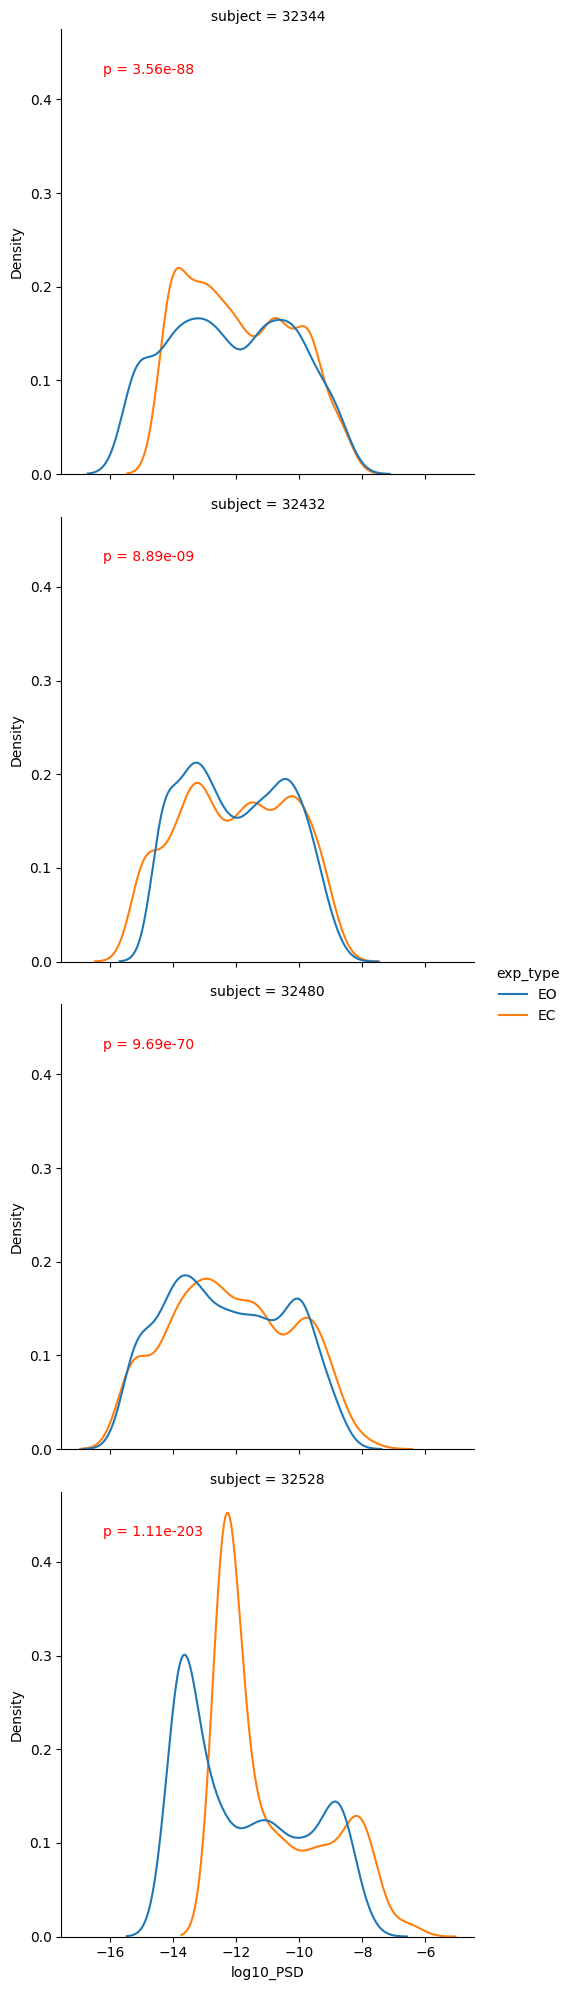

In [3]:
##### insert your code #####
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import wilcoxon

# Reset index
psds_df_reset = psds_df.reset_index()

# Melt DataFrame
psds_df_melt = psds_df_reset.melt(id_vars=['frequencies', 'subject', 'exp_type'], var_name='channel', value_name='PSD')

# Filter DataFrame for channel "PO8"
psds_df_PO8 = psds_df_melt[psds_df_melt['channel'] == 'PO8']

# Calculate log10(PSD) values
psds_df_PO8['log10_PSD'] = np.log10(psds_df_PO8['PSD'])

# Create FacetGrid
facet_grid = sns.displot(data=psds_df_PO8, row='subject', hue='exp_type', x='log10_PSD', kind='kde', common_norm=False)

# Perform Wilcoxon signed-rank test and write p-value on each panel
for subject, ax in facet_grid.axes_dict.items():
    data_EO = psds_df_PO8[(psds_df_PO8['subject'] == subject) & (psds_df_PO8['exp_type'] == 'EO')]['log10_PSD']
    data_EC = psds_df_PO8[(psds_df_PO8['subject'] == subject) & (psds_df_PO8['exp_type'] == 'EC')]['log10_PSD']
    _, p = wilcoxon(data_EO, data_EC)
    ax.text(0.1, 0.9, f'p = {p:.2e}', transform=ax.transAxes, color='red')

############################

Q4 Answer:
Similarly, the p-value you obtained in this case is also extremely small (9.69e-70).

The null hypothesis of the Wilcoxon signed-rank test is that the distributions of the two paired samples ('EO' and 'EC') are identical. Since the p-value is significantly less than 0.05, you can reject the null hypothesis and conclude that there is a statistically significant difference between the distributions of 'EO' and 'EC' for the subject 32480.

In other words, for the subject 32480, the log10(PSD) values under 'EO' and 'EC' conditions appear to be significantly different.

We know from the Lab 4 that the power spectrum density (PSD) of EEG signals decreases with the frequency (that was visible on the panel [1, 0]). Actually, this power is known to decrease with the inverse of the frequency. We also know that there is a difference in these power values between the two experimental conditions (eyes-closed vs. eyes-open), with increased power when the eyes are closed. We also had indications that the difference between these two experimental conditions was modulated by the frequency (remember: it peaked at 9.7 Hz, in what is known as the *alpha band*). Such a "modulation" of the effect of one factor by a second factor is called an interaction effect. We would like to test if this effect is statistically significant. This can be tested with a linear regression using the formula **"log_psd ~ frequencies*exp_type"**. Such a formula instructs StatsModels to test the effects of **exp_type**, **frequencies** and their interaction, noted **frequencies:exp_type**. That is, "z ~ x\*y" is a short representation for "z ~ x + y + x:y" such that both formulas can be used interchangeably. Similarly, "z ~ w\*x\*y" is equivalent to "z ~ w + x + y + w:x + w:y + x:y + w:x:y". i.e., all the *main effects* (x, y, and z) plus all the *two-way interactions* (w:x, w:y, and x:y) plus the *triple interaction* (w:x:y). Such a model is referred to as a *full factorial regression model* because it includes all the interactions between all the factors.

Note that, in reality, since we know that our distributions are not normal\*, we should use a non-parametric linear regression approach instead of the ordinary least square (OLS) regression shown in the example in class. For this lab, we will nevertheless use the **smf.ols** method to avoid complicating the lab with the intricacies of running non-parametric regressions in StatsModels. However, this would be questionable for an actual project.

\* More precisely, it is the distribution of the residuals (the epsilon term in the slides) that needs to be normally distributed for the OLS regression.

**QUESTION 5.** In blackboard, enter the p-value for interaction frequencies:exp_type[T.EO] using the X.XXe-XX format.

**QUESTION 6.** What do you conclude from this p-value?

Note that the summary() will only show 0.000 for small values instead of the accurate value in scientific notation. To access this value, you can use the **pvalue** attribute of the object returned by the **fit()** function.

In [4]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

##### insert your code #####

# Specify the EEG channel
channel = 'PO8'

# Calculate log10(PSD) values
psds_df_reset['log_psd'] = np.log10(psds_df_reset[channel])

# Perform OLS regression
model = smf.ols(formula="log_psd ~ frequencies*exp_type", data=psds_df_reset)

# Fit the model
results = model.fit()

# Print the p-value for the interaction term "frequencies:exp_type[T.EO]" if it exists in the results
interaction_term = "frequencies:exp_type[T.EO]"
if interaction_term in results.pvalues:
    print(f'p-value for interaction term "{interaction_term}" in channel {channel}: {results.pvalues[interaction_term]:.2e}')
else:
    print(f'The interaction term "{interaction_term}" is not in the model for channel {channel}.')

p-value for interaction term "frequencies:exp_type[T.EO]" in channel PO8: 1.58e-15


Q6 Answer:
Again, the p-value obtained is extremely small (1.58e-15).

In this case, the null hypothesis is that the interaction term "frequencies:exp_type[T.EO]" has no effect on the dependent variable 'log_psd'. Since the p-value is significantly less than 0.05, you can reject the null hypothesis and conclude that the interaction between 'frequencies' and 'exp_type[T.EO]' has a statistically significant effect on 'log_psd'.

In other words, the relationship between 'frequencies' and 'log_psd' is not the same for all levels of 'exp_type'. Specifically, the relationship is different when 'exp_type' is 'EO' compared to when it is not 'EO'.

Note that the output of the regression models mentions that there are 10,008 observations. However, the observations are nested within participants (i.e., we have repeated measurements in the same participants). To properly account for that hierarchical structure, we would need to use a Mixed-Effect model where we can specify that there are repeated measures in every subject. The code for such a model would look like this:

```python
import statsmodels.api as sm
import statsmodels.formula.api as smf

model = smf.mixedlm("log_psd ~ frequencies*exp_type", data, groups=data["subject"]).fit()
model.summary()
```